In [15]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

# Laboratorio 3

## Parte 1: NUMPY

### Ejercicio 1

In [8]:
array_booleano = np.ones(1000)
array_booleano = np.array(array_booleano, dtype=bool)
print('El tamaño de bytes del array de 1000 booleanoes es: ', array_booleano.itemsize)

El tamaño de bytes del array de 1000 booleanoes es:  1


### Ejercicio 2

In [12]:
enteros = list(range(1,1001))
enteros_pares = []
for i in enteros:
    if (i % 2) == 0:
        enteros_pares.append(i)
enteros_pares.sort(reverse=True)
enteros_pares = np.array(enteros_pares)
print(enteros_pares[enteros_pares.size-10:])

[20 18 16 14 12 10  8  6  4  2]


### Ejercicio 3

In [19]:
arr = np.array([[2,4,5,6],
                [0,3,7,4],
                [8,8,5,2],
                [1,5,6,1]])
print(arr[1])

[0 3 7 4]


### Ejercicio 4

In [23]:
a = np.array([1,4,2,7])
b = np.array([1,3,2,9])
resta = a-b
media = np.mean(resta)
print('La meadia de la diferencia (a-b) es: ', media)

La meadia de la diferencia (a-b) es:  -0.25


### Ejercicio 5

In [9]:
arr = np.array([[1.33,4.5],
                [30.0,10.7],
                [70.2,0.5]])
coo = np.array([37.1,-3.6])
np.insert(arr,0,coo)

array([37.1 , -3.6 ,  1.33,  4.5 , 30.  , 10.7 , 70.2 ,  0.5 ])

## Parte 2

In [11]:
df_nucleos = pd.read_csv('Lab_3/NucleosPoblacion.csv')

### Ejercicio 1

In [12]:
print(len(df_nucleos[df_nucleos['Poblacion']>100000]))

62


Existen 62 ciudades en nuestro DataFrame cuya población es mayor a 100000 habitantes.

### Ejercicio 2

<BarContainer object of 852 artists>

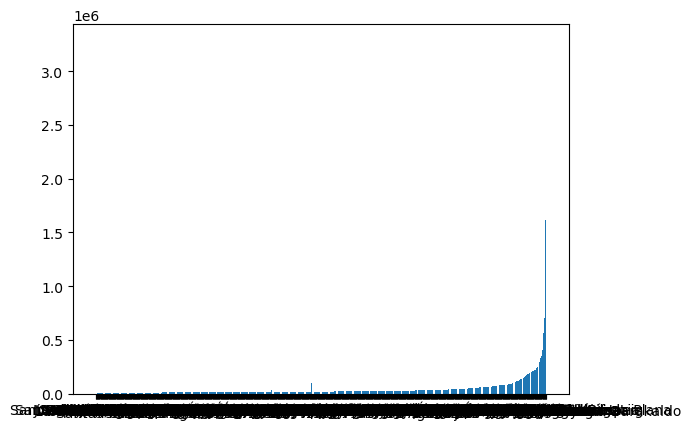

In [16]:
df_pob = df_nucleos.sort_values(by=['Poblacion'])
plt.bar(df_pob['Texto'],
               df_pob['Poblacion'])

In [18]:
df_pob.iloc[len(df_pob)-2]

FID                623
OBJECTID           624
Texto        Barcelona
Poblacion    1619337.0
CodMun            8019
Municipio    Barcelona
CodProvin            8
Provincia    Barcelona
X             2.176349
Y            41.384247
Name: 623, dtype: object

#### (a) ¿Cuál es la segunda ciudad más poblada?
La segunda ciudad más poblada es Barcelona.

In [25]:
df_pob = df_pob.reset_index(drop=True)
df_pob[df_pob['Texto'] == 'Granada'].index

Int64Index([834], dtype='int64')

#### (b) ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?
La ciudad de Granada es la ciudad número 835 más poblada, de menor a mayor población.

### Ejercicio 3